In [1]:
import pandas as pd 
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()

from stop_permuting_features.src.utils import get_lr

In [2]:
data_path = "../data/experiment_results_no_relearn.csv"
data = pd.read_csv(data_path)

In [3]:
data.shape

(1200, 14)

In [4]:
data.head()

,corr_data_correlation_min,corr_data_correlation_max,corr_data_correlation_median,corr_data_correlation_mean,corr_data_correlation_std,corr_data_abs_correlation_min,corr_data_abs_correlation_max,corr_data_abs_correlation_median,corr_data_abs_correlation_mean,corr_data_abs_correlation_std,model_roc_auc,permutation_ranks_corr,shap_ranks_corr,gain_ranks_corr
0,0.877488,0.950591,0.925791,0.925323,0.016195,0.877488,0.950591,0.925791,0.925323,0.016195,0.885348,0.716206,0.785005,0.782175
1,0.882767,0.951713,0.933249,0.930339,0.012755,0.882767,0.951713,0.933249,0.930339,0.012755,0.978117,0.686242,0.728045,0.728725
2,0.881305,0.950073,0.930267,0.928102,0.013564,0.881305,0.950073,0.930267,0.928102,0.013564,0.979894,0.734550,0.751412,0.780344
3,0.881314,0.952119,0.926747,0.924982,0.015625,0.881314,0.952119,0.926747,0.924982,0.015625,0.991782,0.845666,0.851909,0.836447
4,0.879068,0.950692,0.927173,0.925900,0.016056,0.879068,0.950692,0.927173,0.925900,0.016056,0.892026,0.750972,0.816573,0.816071


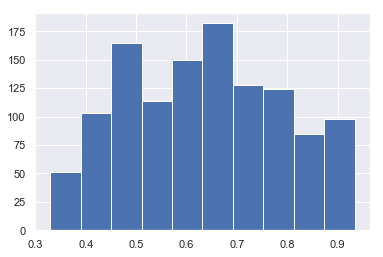

In [5]:
data["corr_data_abs_correlation_mean"].hist()

R2 score permutation_ranks_corr: 0.2312
R2 score shap_ranks_corr: 0.2461
R2 score gain_ranks_corr: 0.2476


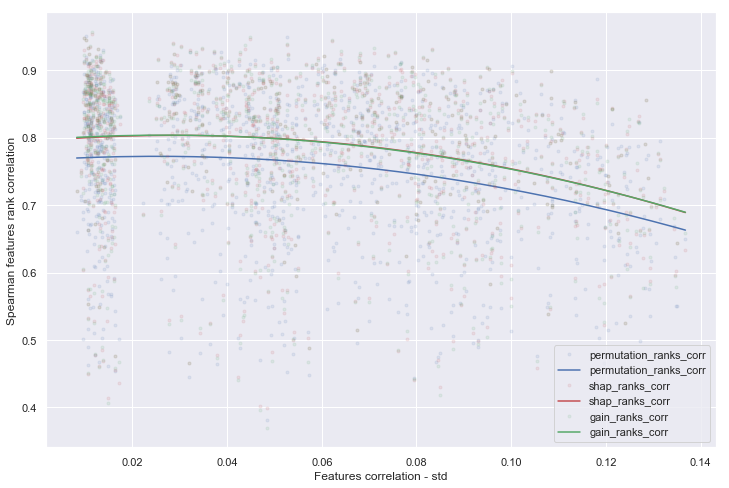

In [6]:
x_label = "corr_data_abs_correlation_std"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(12, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}", alpha=0.1)
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree, y_label), f"-{y_color}", label=y_label_legend)

plt.xlabel("Features correlation - std")
plt.ylabel("Spearman features rank correlation")
plt.legend()
plt.show()

R2 score permutation_ranks_corr: 0.2223
R2 score shap_ranks_corr: 0.3137
R2 score gain_ranks_corr: 0.3055


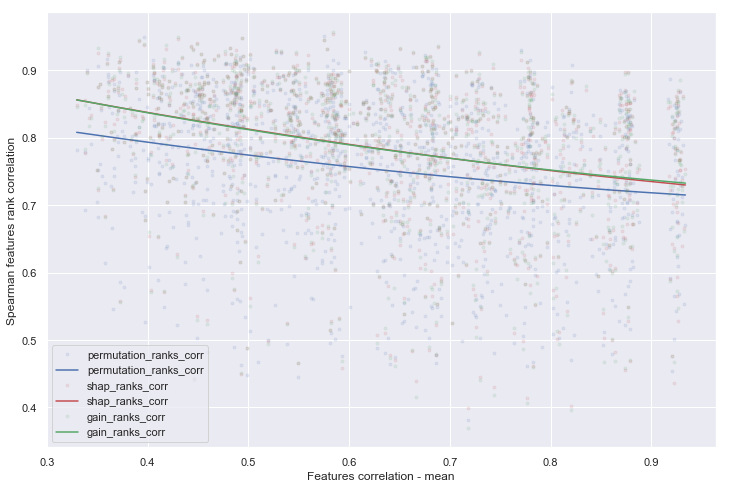

In [7]:
x_label = "corr_data_abs_correlation_mean"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(12, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}", alpha=0.1)
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree, y_label), f"-{y_color}", label=y_label_legend)

plt.xlabel("Features correlation - mean")
plt.ylabel("Spearman features rank correlation")
plt.legend()
plt.show()

R2 score : 0.3387
R2 score : 0.4233
R2 score : 0.4163


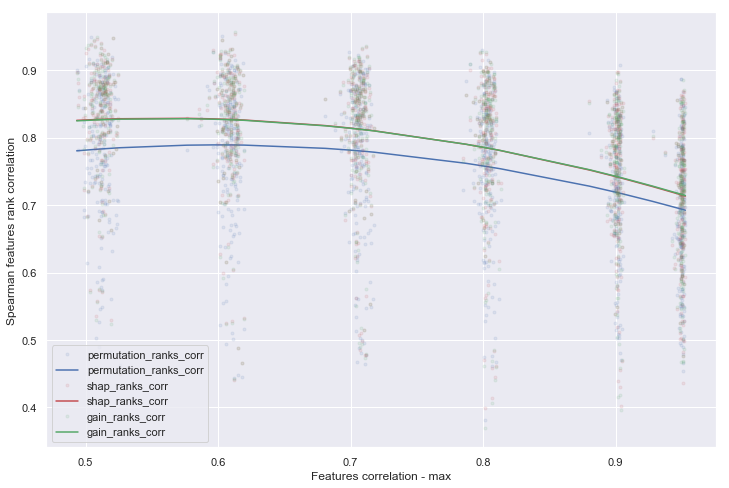

In [8]:
x_label = "corr_data_abs_correlation_max"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(12, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}", alpha=0.1)
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree), f"-{y_color}", label=y_label_legend)

plt.xlabel("Features correlation - max")
plt.ylabel("Spearman features rank correlation")
plt.legend()
plt.show()

R2 score : 0.3024
R2 score : 0.5587
R2 score : 0.5499


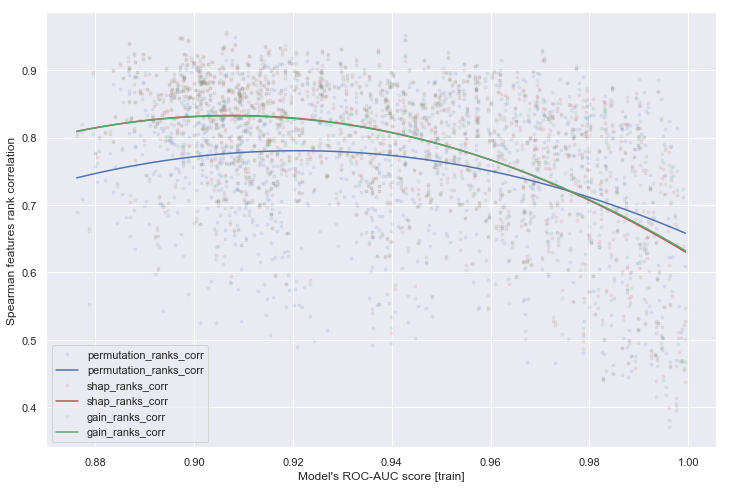

In [9]:
x_label = "model_roc_auc"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(12, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}", alpha=0.1)
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree), f"-{y_color}", label=y_label_legend)

plt.xlabel("Model's ROC-AUC score [train]")
plt.ylabel("Spearman features rank correlation")
plt.legend()
plt.show()

R2 score : 0.3024


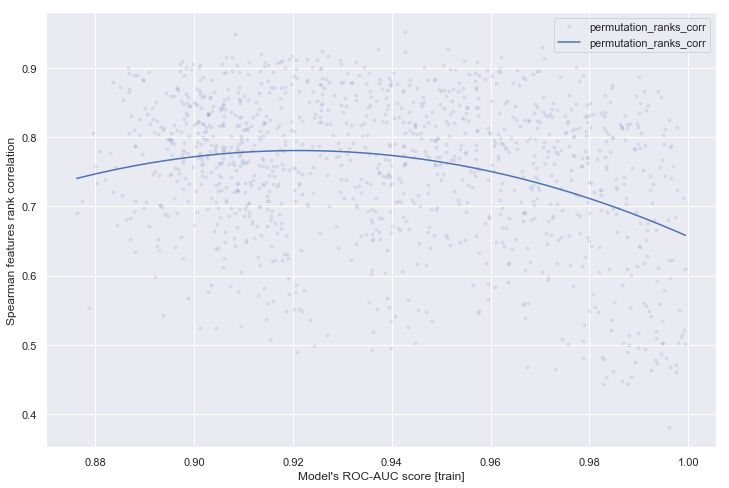

In [10]:
x_label = "model_roc_auc"
y_labels = ["permutation_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr"]
degrees = [2]
y_colors = ["b"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(12, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}", alpha=0.1)
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree), f"-{y_color}", label=y_label_legend)

plt.xlabel("Model's ROC-AUC score [train]")
plt.ylabel("Spearman features rank correlation")
plt.legend()
plt.show()

R2 score : 0.3049


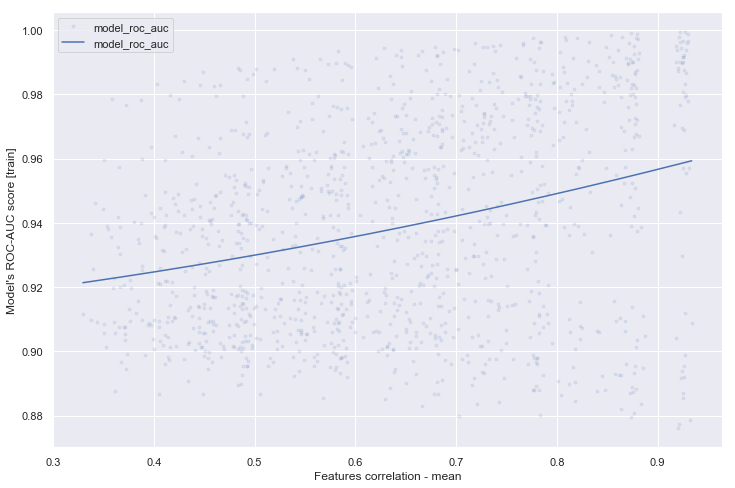

In [11]:
x_label = "corr_data_abs_correlation_mean"
y_labels = ["model_roc_auc"]
y_labels_legend = ["model_roc_auc"]
degrees = [2]
y_colors = ["b"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(12, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}", alpha=0.1)
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree), f"-{y_color}", label=y_label_legend)

plt.xlabel("Features correlation - mean")
plt.ylabel("Model's ROC-AUC score [train]")
plt.legend()
plt.show()